# High Crime Analysis

*Johanna Luke*

For this dataset, our goal was to find the neighborhood with the greatest amount of crimes committed. This would show us which neighborhood was the most unsafe and thus the most ideal for a reality TV show. 

First we're going to load pandas and the Crime dataset we found. 

In [5]:
import pandas as pd
import numpy as np

#import geopands to plot a map
import geopandas

#also importing matplot
from matplotlib import pyplot as plt

crime= pd.read_csv("HighCrime.csv")
#crimeEdit=pd.read_csv("HighCrime-edited.csv")


Now we're going to load in all the neighborhoods where certain crimes have taken place. 

In [3]:
crime['INCIDENTNEIGHBORHOOD'].value_counts()

South Side Flats               4838
Golden Triangle/Civic Arena    3637
Carrick                        2585
Bloomfield                     2531
Shadyside                      1894
                               ... 
Outside State                    48
Mount Oliver                     47
Outside County                   45
Chartiers City                   38
Mt. Oliver Boro                  16
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

As we can see from just this table breakdown, South Side Flats has won for the neighborhood with the most amount of crime incidents

Now this table is a little boring to look at so let's plot this with a bar graph to see it clearly.

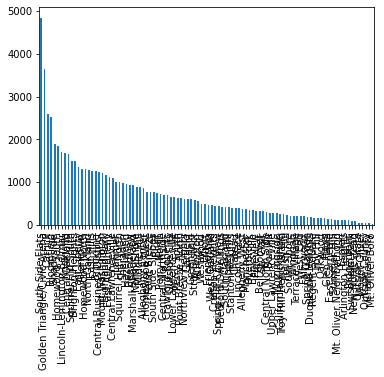

In [6]:
hc_series = pd.Series(crime['INCIDENTNEIGHBORHOOD'].value_counts(), name = "Crime")
hc_series.plot.bar()

As you can see this is a lot to look at because it's trying to plot 98 different neighborhoods onto one graph. So let's graph the top 10 neighborhoods instead.

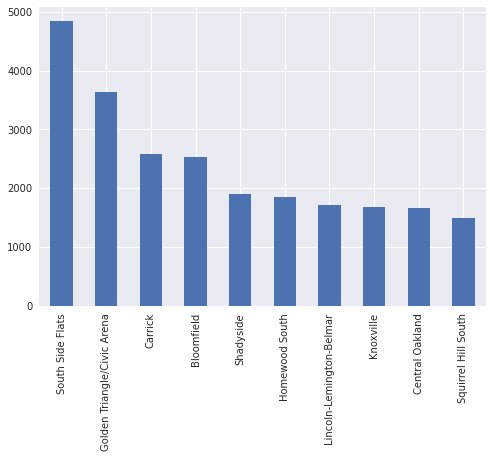

In [5]:
plt.style.use('seaborn')
hc_series.head(10).plot.bar()

MUCH better. As you can see, South Side Flats has almost 5000 crime incidents in this neighborhood which makes it the most unsafe. 

However, we don't want to discredit the other neighborhoods. Let's look at these incidents on a map so we can see the crime distribution across Allegheny County. So first let's load in our shapefile. 

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

Now that we've downloaded our shapefile, we're going to overlay our crime incident neighborhoods overtop this new map. 

In [9]:
crime_map = neighborhoods.merge(crime, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

First we have to calculate the number of incidents of each neighborhood and then display that on the map. We do this by converting our series into a data frame. 

In [13]:
df= hc_series.to_frame()
df.index


Index(['South Side Flats', 'Golden Triangle/Civic Arena', 'Carrick',
       'Bloomfield', 'Shadyside', 'Homewood South', 'Lincoln-Lemington-Belmar',
       'Knoxville', 'Central Oakland', 'Squirrel Hill South',
       'Brighton Heights', 'East Liberty', 'Allentown', 'Homewood North',
       'North Oakland', 'East Hills', 'Brookline', 'Central Business District',
       'Mount Washington', 'Highland Park', 'East Allegheny',
       'Central Lawrenceville', 'Larimer', 'Squirrel Hill North', 'Sheraden',
       'Hazelwood', 'Beechview', 'Marshall-Shadeland', 'North Shore',
       'Middle Hill', 'Allegheny Center', 'Homewood West', 'Point Breeze',
       'South Side Slopes', 'Bluff', 'Perry North', 'Central Northside',
       'Crawford-Roberts', 'Outside City', 'Lower Lawrenceville',
       'Perry South', 'Point Breeze North', 'Northview Heights', 'Garfield',
       'Greenfield', 'Strip District', 'Arlington', 'Westwood', 'Elliott',
       'Friendship', 'West Oakland', 'Crafton Heights',
   

We printed out the index above so that we could use it below for our right_on value. We then merge our crime map with the neighborhoods shape file. 

In [17]:
crime_map = neighborhoods.merge(df, how='left', left_on='hood', right_on=df.index)

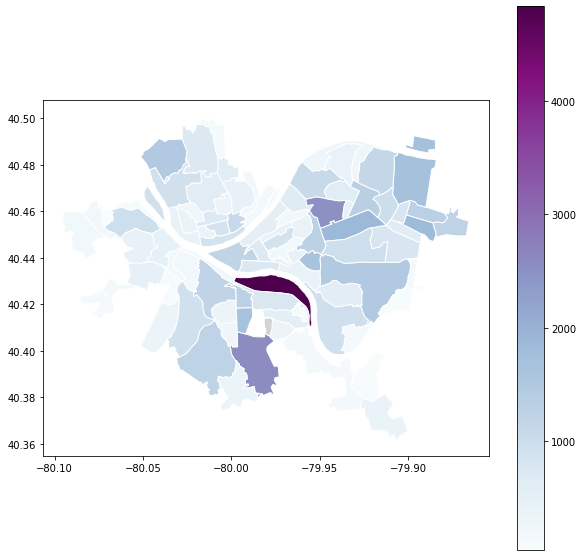

In [16]:
crime_map.plot(column='Crime',
               cmap='BuPu',
               edgecolor="white",
               legend=True,
               figsize=(10, 10),
               missing_kwds={"color": "lightgrey"})

As you can see, the neighborhood with the most amount of crime incidents is South Side Flats. The next top 3 neighborhoods are Currick, Bloomfield, and Shadyside. 